In [ ]:
!pip install opendatasets

Open datasets ini digunakan untuk mengambil data dari kaggle hanya dengan menggunakan link dataset kaggle. Tentu ini harus menggunakan key dan username dari kaggle untuk mengimport dataset tersebut

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp")

Skipping, found downloaded files in "./emotions-dataset-for-nlp" (use force=True to force download)


Dataset sudah diupload ke dalam file ini. 

#Import library

In [ ]:
#Untuk mengvisualisasikan data dan mengubah data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk Preprocessing data
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Untuk train model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout
from keras.callbacks import Callback, EarlyStopping


In [ ]:
df_train = pd.read_csv('/content/emotions-dataset-for-nlp/train.txt',sep=';',names=["sentence", "emotion"])
df_val = pd.read_csv('/content/emotions-dataset-for-nlp/val.txt',sep=';',names=["sentence", "emotion"])
df_test = pd.read_csv('/content/emotions-dataset-for-nlp/test.txt',sep=';',names=["sentence", "emotion"])

In [ ]:
df_train

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_val

,sentence,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
df_test

,sentence,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [ ]:
df = pd.concat([df_train,df_val])

In [ ]:
df

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


Text(0, 0.5, 'Total')

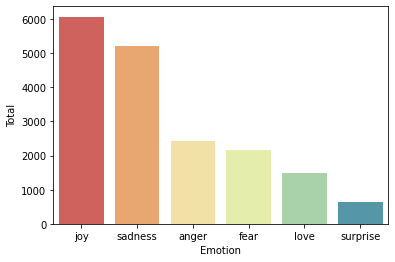

In [ ]:
sns.barplot(x = df['emotion'].value_counts().index,y=df['emotion'].value_counts(),palette="Spectral")

plt.xlabel('Emotion')
plt.ylabel('Total')

Disini kita bisa lihat bahwa ada 6 emotion dari dataset ini.

In [ ]:
y = pd.get_dummies(df['emotion'])

y = y.values

X = df['sentence'].values

In [ ]:
y.shape

(18000, 6)

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:


token = Tokenizer(num_words =5000 ,oov_token = '/-/')
token.fit_on_texts(x_train)
token.fit_on_texts(x_test)

sequence_train = token.texts_to_sequences(x_train)
sequence_test = token.texts_to_sequences(x_test)

pad_train = pad_sequences(sequence_train,maxlen=50)
pad_test= pad_sequences(sequence_test,maxlen=50)

#Model Training

In [ ]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    restore_best_weights=True,
)

In [ ]:
hist = model.fit(pad_train,y_train,epochs=100,validation_data=(pad_test,y_test),callbacks=[callbacks])

Epoch 1/100
450/450 [==============================] - 55s 92ms/step - loss: 1.5353 - accuracy: 0.4123 - val_loss: 1.2978 - val_accuracy: 0.5689
Epoch 2/100
450/450 [==============================] - 41s 91ms/step - loss: 1.2181 - accuracy: 0.5644 - val_loss: 1.1269 - val_accuracy: 0.5908
Epoch 3/100
450/450 [==============================] - 41s 91ms/step - loss: 1.0192 - accuracy: 0.6060 - val_loss: 0.8971 - val_accuracy: 0.6072
Epoch 4/100
450/450 [==============================] - 41s 91ms/step - loss: 0.8424 - accuracy: 0.6776 - val_loss: 0.7415 - val_accuracy: 0.7297
Epoch 5/100
450/450 [==============================] - 41s 91ms/step - loss: 0.7158 - accuracy: 0.7333 - val_loss: 0.5580 - val_accuracy: 0.7642
Epoch 6/100
450/450 [==============================] - 41s 91ms/step - loss: 0.6234 - accuracy: 0.7810 - val_loss: 0.6169 - val_accuracy: 0.8172
Epoch 7/100
450/450 [==============================] - 41s 90ms/step - loss: 0.5847 - accuracy: 0.7924 - val_loss: 0.4828 - val_ac

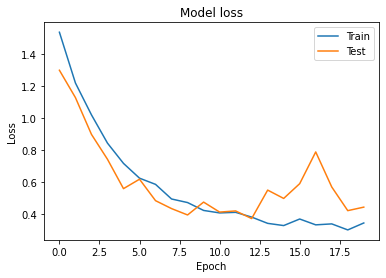

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

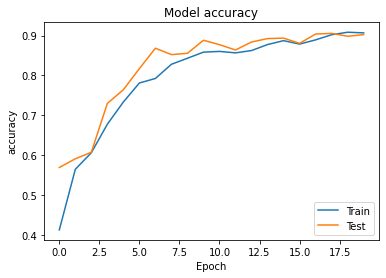

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [ ]:
nu = pd.get_dummies(df['emotion'])
nu

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1995,0,0,0,0,1,0
1996,0,0,1,0,0,0
1997,0,0,1,0,0,0
1998,0,0,1,0,0,0


In [ ]:
test = nu.columns
test

Index(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='object')

In [ ]:
import numpy as np
def response(sentence):
  token.fit_on_texts(sentence)
  sequence = token.texts_to_sequences(sentence)
  pad = pad_sequences(sequence,maxlen=50)
  pred_class = model.predict([pad])
  label = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

  return label[np.argmax(pred_class)-1]

print("Note: Enter 'quit' to break the loop.")
while True:
    input_ = input('You: ')
    if input_.lower() == 'quit':
        break
    typ = response(input_)
    print(typ)

Note: Enter 'quit' to break the loop.
You: I was frustrated


IndexError: ignored